### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
from scipy.stats import zscore
from pandas import DataFrame
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster

In [3]:
# reading the CSV file into pandas dataframe
vehicles = pd.read_csv("vehicle.csv") 
print(vehicles.shape)

(846, 19)


In [4]:
# Provides information if there are any null values
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
# Drop empty values 
vehicles.dropna(inplace=True)
print(vehicles.shape)

(813, 19)


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [6]:
# Print the categorical coulumns.
vehicles['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [7]:
#Check for null values
vehicles.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

No column has null value

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

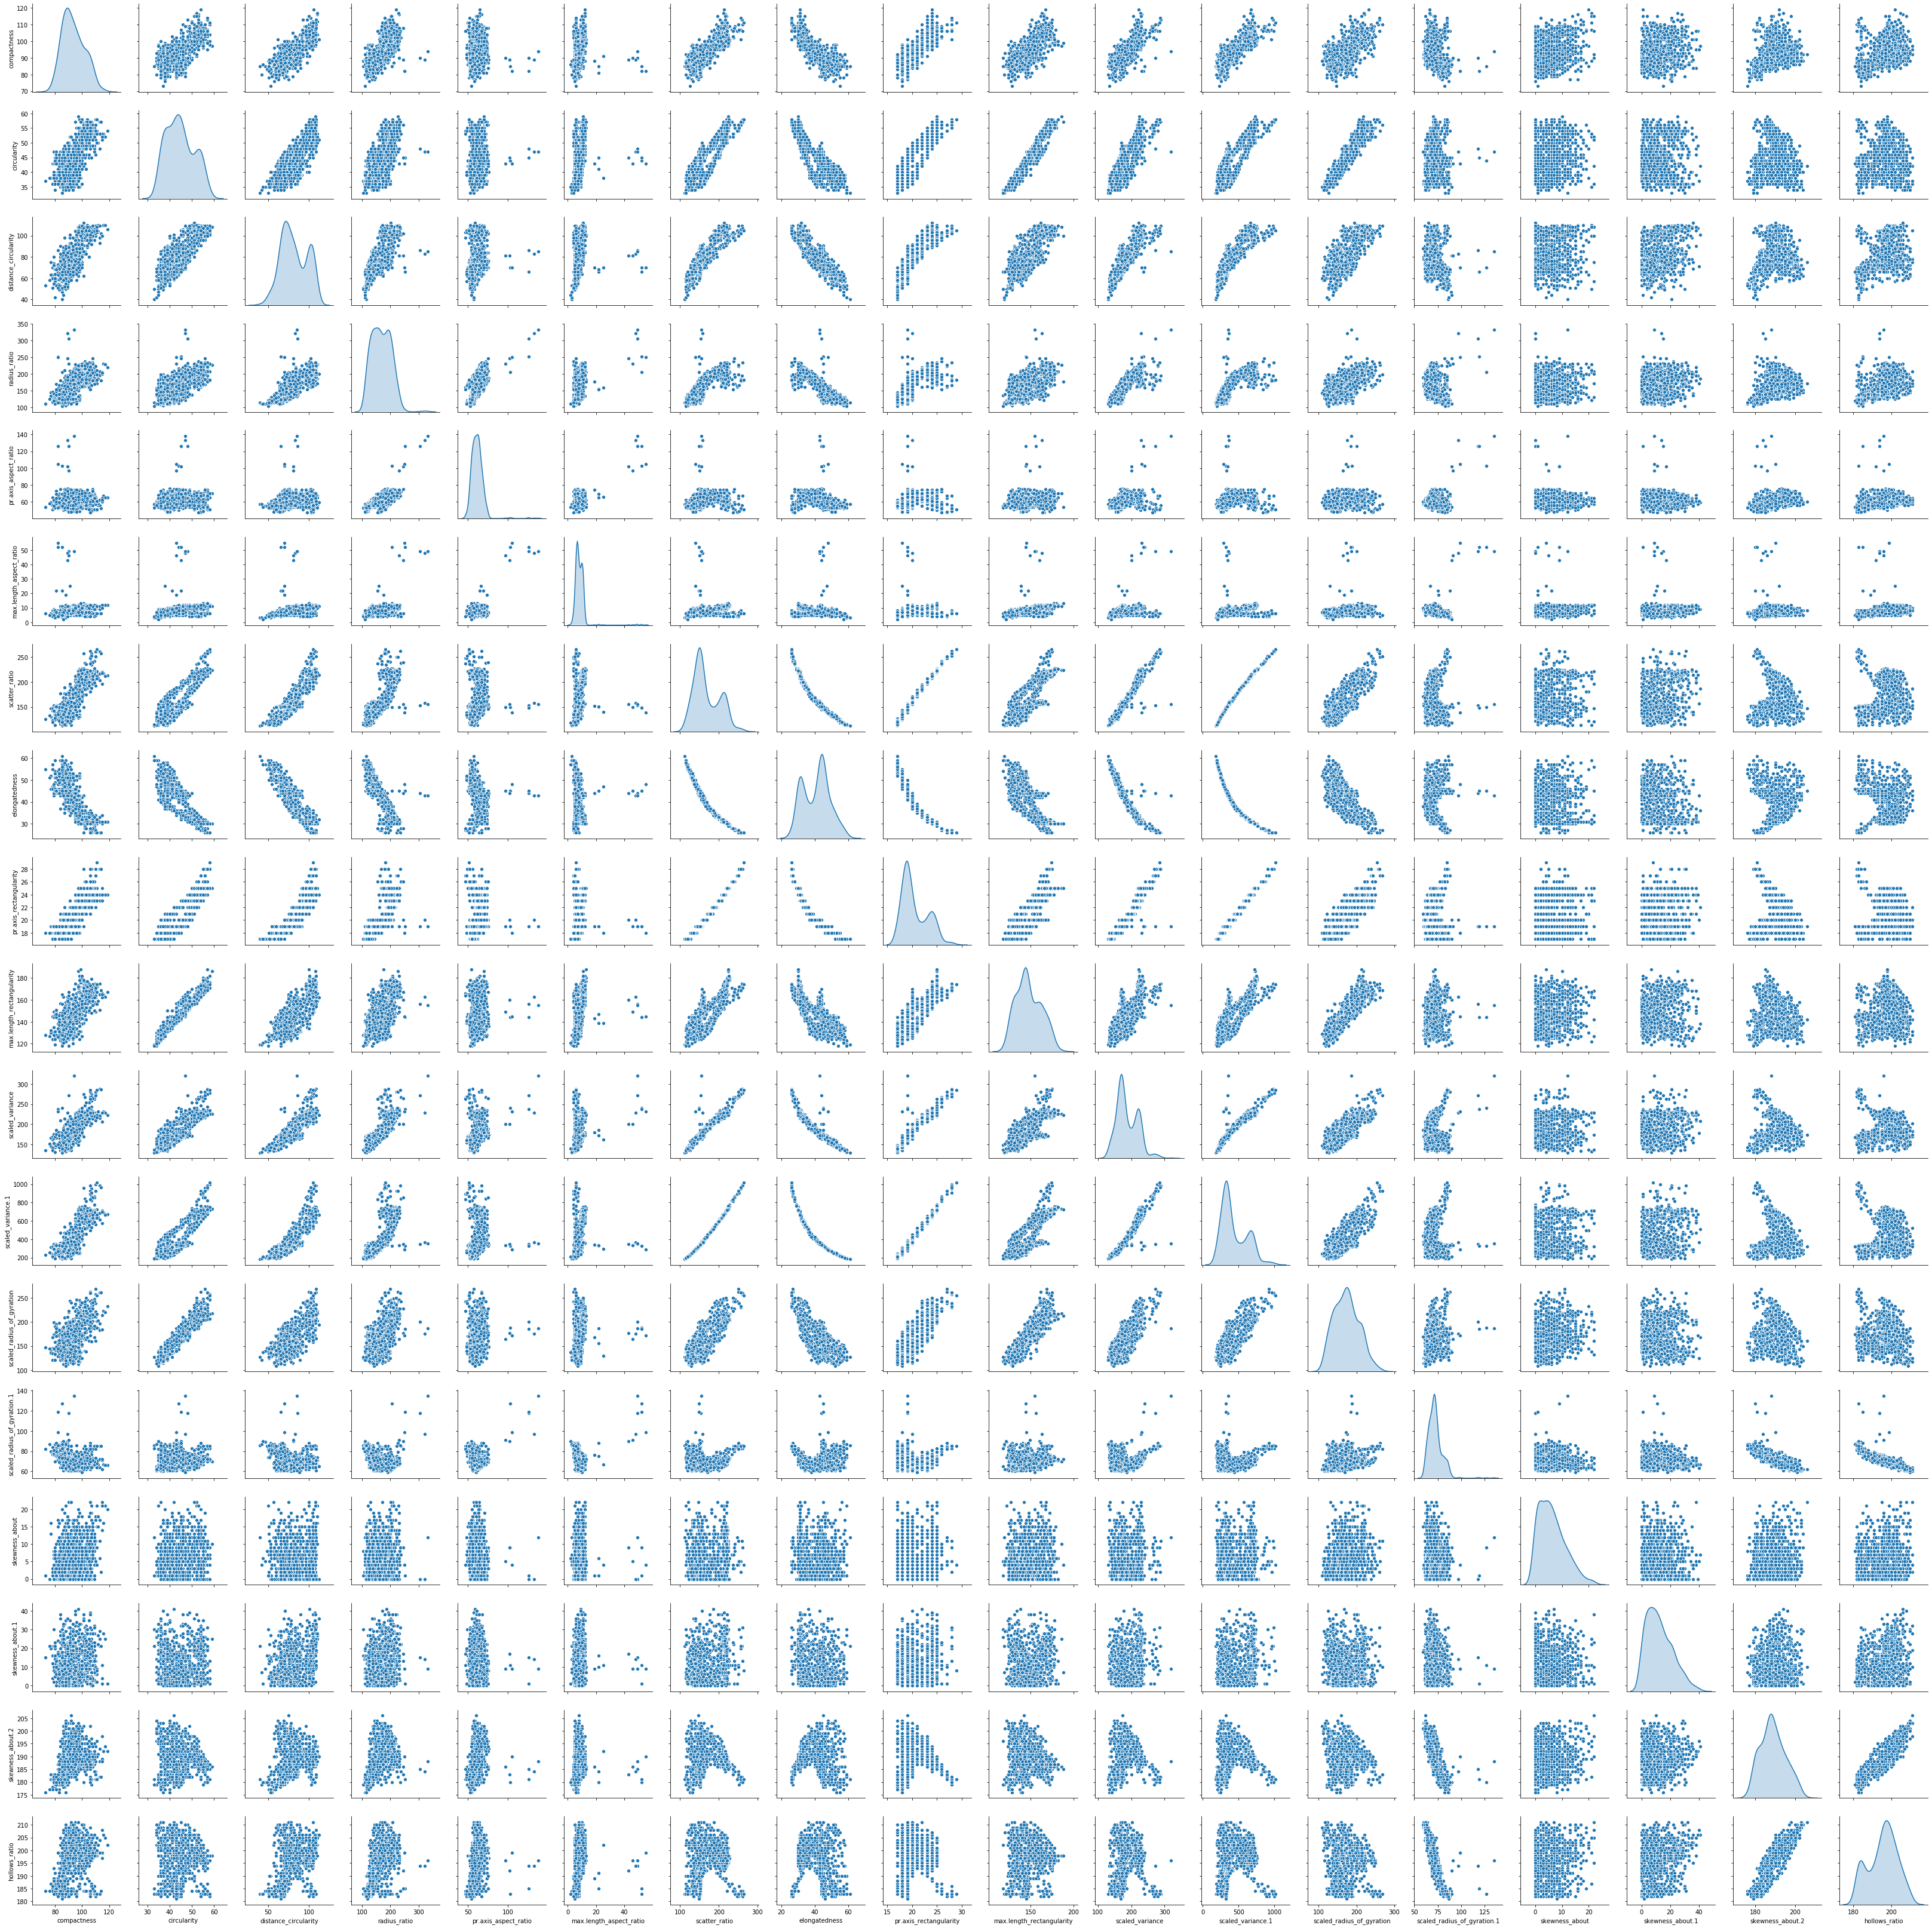

In [111]:
#Pair-Plot the variables
sns.pairplot(vehicles, diag_kind='kde' )  

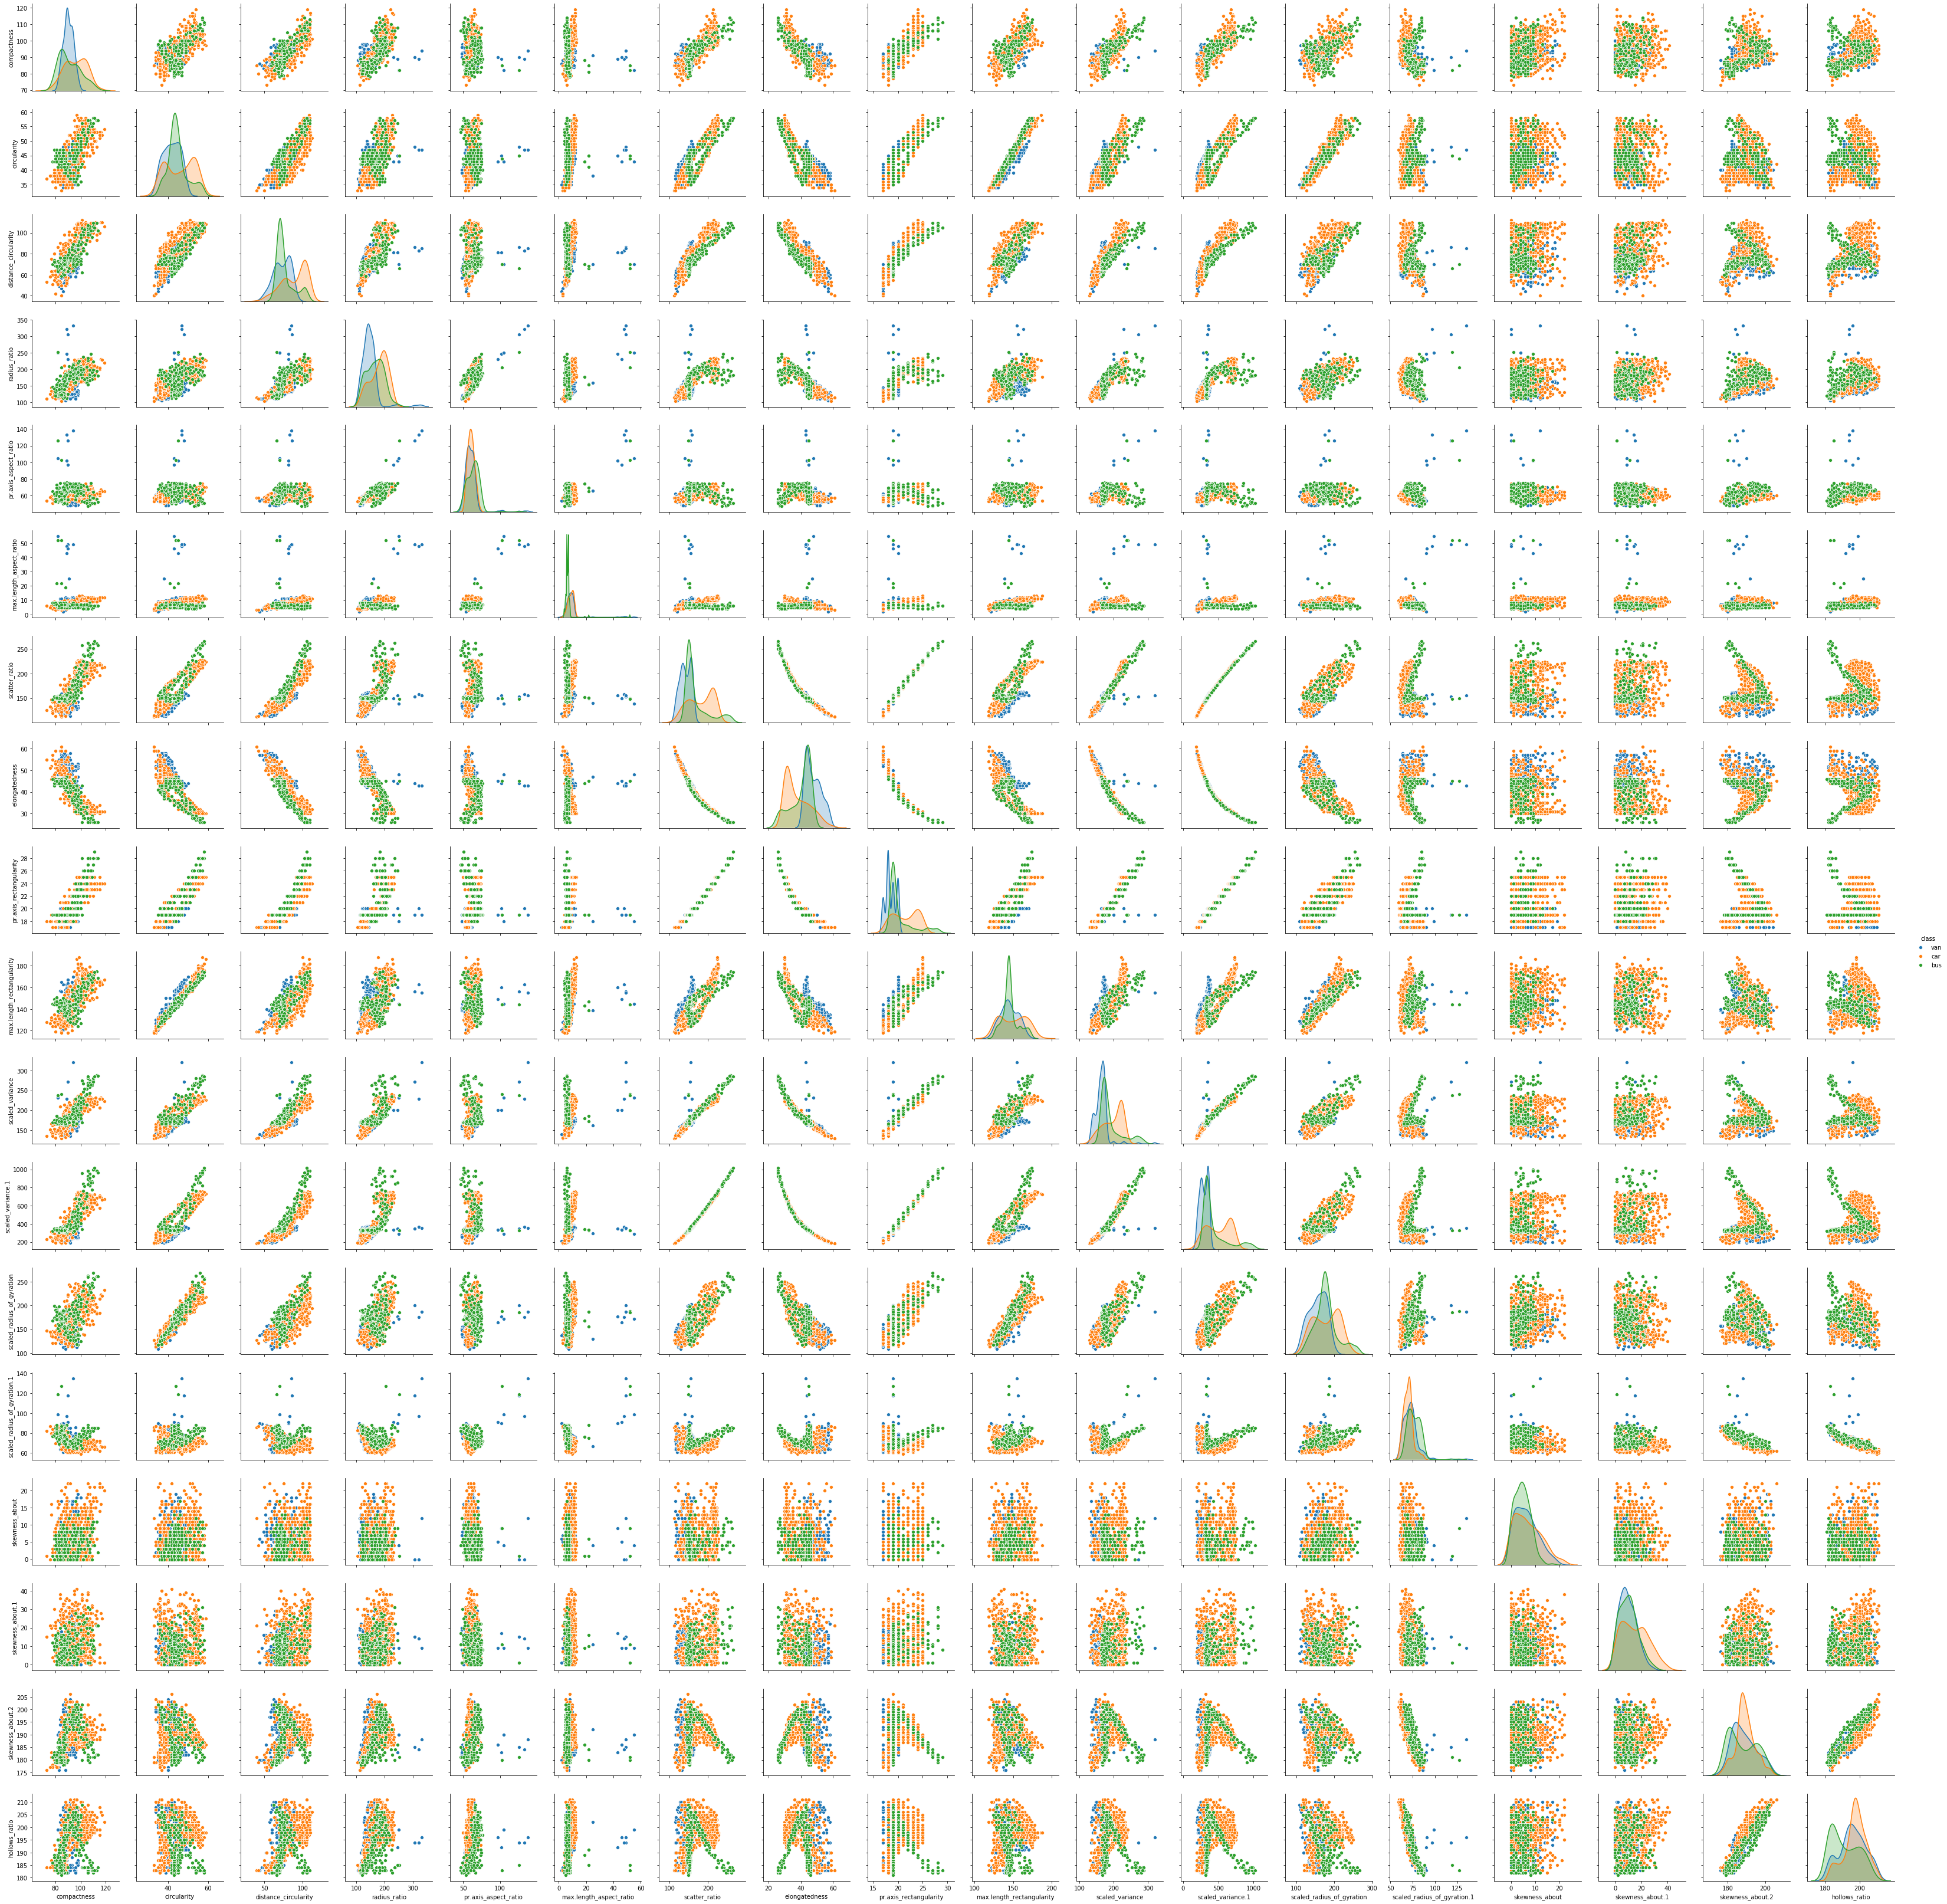

In [123]:
sns.pairplot(vehicles, diag_kind='kde', hue='class' )  

In [124]:
# Drop the class since its categorical and is used for analysis
vehicles.drop(['class'], axis=1, inplace=True)

In [125]:
vehicles_z = vehicles.apply(zscore)
vehicles_z

compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
4      -1.052030    -0.130753             -0.763506      1.068668   
6       0.406283    -0.293543             -0.573312      0.116137   
7      -0.444400    -0.293543             -1.017098     -0.360128   
8      -0.930504    -1.758654             -1.270690     -0.866160   
10     -0.930504    -1.433074             -0.763506     -0.776860   
11     -0.444400    -1.758654             -1.017098     -0.985226   
12     -0.687452     0.194828             -0.509914      0.056604   
13     -0.565926    -0.456333              0.187465     -0.747094   
14      0.041705     0.683198             -0.192923      1.009135   
15      0.284757     1.659939              1.328629      0.949602   
16     -0.565926    -1.433074             -1.968068     -1.788924   
17      0.649335    -0.619123             -0.319719      0.830535   
18      1.256966     1.497149              1.138435      0.503103   
20     -1.173556     0.357618             -0.446516     -0.479194   
21     -1.173556    -1.270284             -1.841272     -1.431725   
22      0.041705    -0.293543             -1.143894      0.116137   
23     -0.808978    -0.944703             -0.763506     -0.628027   
24      0.649335     1.334359              1.455425      1.485400   
25     -1.052030     0.032037             -0.129525     -0.449428   
26     -1.295083    -1.433074             -1.777874     -1.491258   
27      1.621544     1.497149              1.011639      1.009135   
28      1.013913     0.032037              0.187465      0.711469   
29     -1.659661    -1.107494             -1.207292     -1.193592   
30     -0.565926    -0.293543              0.187465     -0.270828   
31     -0.687452    -0.456333             -0.319719     -0.538728   
32     -0.079822    -1.595864             -1.017098     -0.449428   
..           ...          ...                   ...           ...   
816    -0.444400     0.520408              0.187465     -0.360128   
817     1.256966     1.334359              1.645620      1.038901   
818     0.163231    -0.293543              0.884843      0.979368   
819    -0.079822    -0.456333              1.011639      0.681702   
820    -0.808978    -1.107494             -0.700108     -1.372192   
821     1.256966     1.822729              0.884843      1.842599   
822     0.163231    -0.619123             -0.002729      0.026838   
823     1.378492     1.497149              1.455425      1.306800   
824     1.500018     1.659939              0.884843      0.800769   
825    -0.930504    -0.944703              0.124067     -0.598261   
826     0.163231     0.683198              0.631251      0.711469   
827     0.649335     1.985519              1.138435      0.235204   
828    -0.565926    -0.456333             -1.017098     -1.312659   
829     0.163231     0.683198             -0.002729     -0.895926   
830     0.406283    -1.270284             -0.763506      0.116137   
831     0.770861     0.357618             -0.763506      0.473336   
832     1.743070     0.683198              1.709018      1.038901   
833    -0.201348     0.194828              0.060669     -0.449428   
834    -1.416609    -1.433074             -1.968068     -1.640091   
835     2.107648     2.148309              1.455425      0.413803   
836    -0.808978     0.032037             -1.017098     -0.895926   
837     0.041705     0.194828             -0.319719     -0.002929   
838     0.163231    -0.293543             -0.383118     -0.806627   
839    -0.444400    -0.130753             -0.636710     -0.360128   
840    -0.079822    -1.758654             -1.017098     -0.866160   
841    -0.079822    -0.944703              0.314261      0.413803   
842

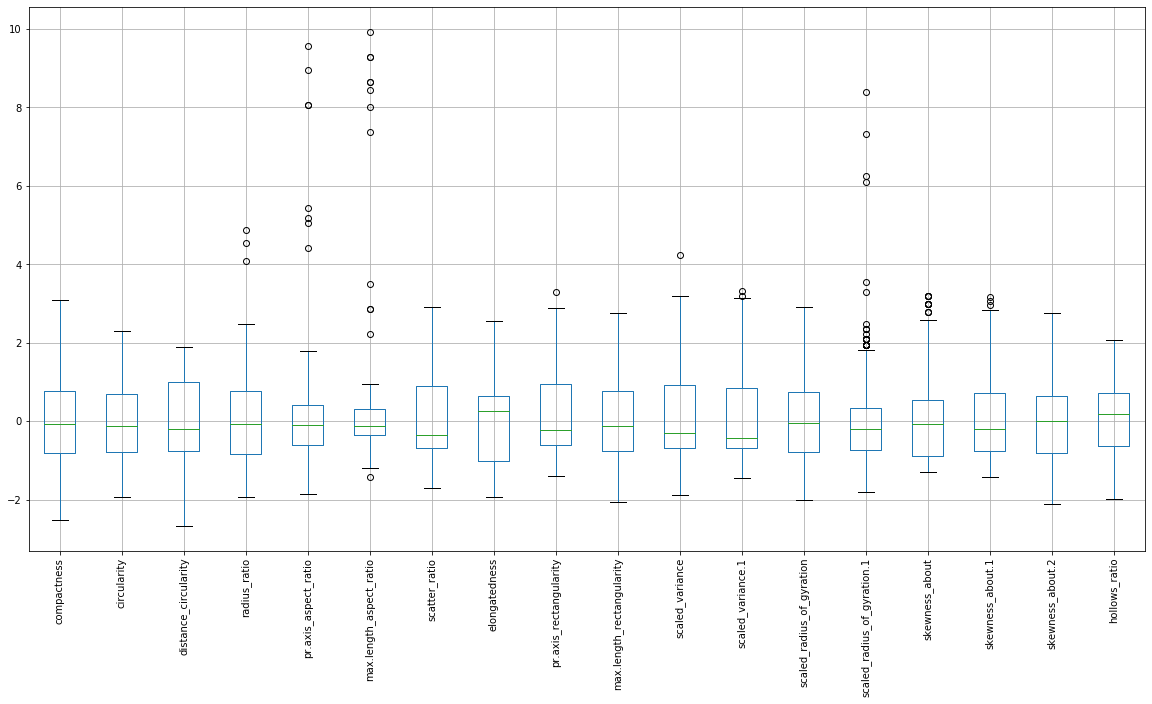

In [126]:
# Box plot the data
vehicles_z.boxplot(figsize=(20, 10), rot=90 )

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [140]:
Cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [141]:
k = range( 1, 10)
cluster_sil_scores = []
for num_clusters in k:
  clusters = KMeans(num_clusters)
  clusters.fit(vehicles_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  Cluster_error.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":k, "cluster_errors": Cluster_error } )
clusters_df[0:15]

num_clusters  cluster_errors
0             1    14634.000000
1             2     8623.136976
2             3     7037.467395
3             4     5739.201327
4             5     5188.911341
5             6     4706.433256
6             7     4355.139334
7             8     4089.894296
8             9     3867.463310

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

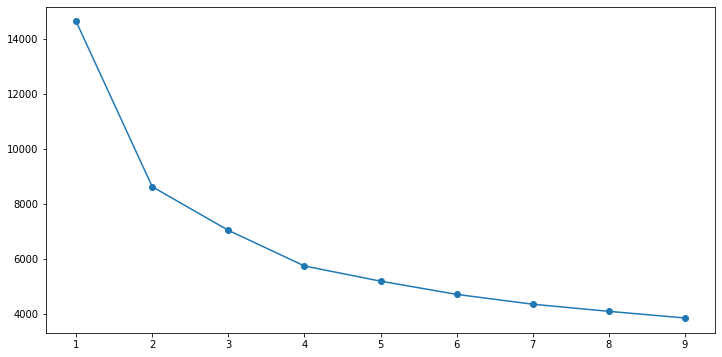

In [137]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [138]:
# The elbow plot shows that 4 might be the optimal value of K.

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [142]:
# Get the centroids.... using function cluster_centers_
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(vehicles_z)

centroids = cluster.cluster_centers_
centroids

array([[-2.13500277e-01, -5.67572972e-01, -2.95628226e-01,
        -1.91022365e-02,  1.91818192e-01, -1.70225098e-01,
        -4.43512774e-01,  3.03183878e-01, -4.73800458e-01,
        -5.31082478e-01, -4.08420378e-01, -4.49349497e-01,
        -5.93030219e-01, -6.52678719e-01, -4.98362181e-02,
         1.18541663e-02,  8.52195044e-01,  7.33987197e-01],
       [ 1.15442786e+00,  1.18428647e+00,  1.21198691e+00,
         9.73321772e-01,  9.49213388e-02,  2.18659142e-01,
         1.29796844e+00, -1.21424667e+00,  1.30184458e+00,
         1.09830595e+00,  1.20590258e+00,  1.30898668e+00,
         1.09121291e+00, -1.07878646e-01,  1.68326262e-01,
         2.67954844e-01,  4.67043879e-03,  1.90327006e-01],
       [-9.06101420e-01, -5.36093671e-01, -8.81135798e-01,
        -1.07237417e+00, -5.48347532e-01, -2.99127932e-01,
        -7.82915761e-01,  8.68120486e-01, -7.49690067e-01,
        -4.98429173e-01, -8.02269752e-01, -7.85506804e-01,
        -4.14229104e-01,  7.37732703e-01, -1.04184507e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [143]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(vehicles_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.213500    -0.567573             -0.295628     -0.019102   
1     1.154428     1.184286              1.211987      0.973322   
2    -0.906101    -0.536094             -0.881136     -1.072374   
3    -0.733024     0.072735             -0.272171      2.947683   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.191818                -0.170225      -0.443513   
1              0.094921                 0.218659       1.297968   
2             -0.548348                -0.299128      -0.782916   
3              6.836652                 8.696706      -0.535008   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.303184               -0.473800                  -0.531082   
1      -1.214247                1.301845                   1.098306   
2       0.868120               -0.749690                  -0.498429   
3       0.466248               -0.557406                   0.283411   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.408420          -0.449349                  -0.593030   
1         1.205903           1.308987                   1.091213   
2        -0.802270          -0.785507                  -0.414229   
3         1.697528          -0.588068                   0.212701   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.652679       -0.049836          0.011854   
1                    -0.107879        0.168326          0.267955   
2                     0.737733       -0.104185         -0.282342   
3                     4.965638       -0.274839         -0.231193   

   skewness_about.2  hollows_ratio  
0          0.852195       0.733987  
1          0.004670       0.190327  
2         -1.008796      -1.065424  
3         -0.707994      -0.453651

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [147]:
labels = cluster.labels_  

In [148]:
labels

array([0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 2, 3, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [8]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [9]:
x = np.concatenate([a,b,c])

In [10]:
df = DataFrame(x, columns=['A', 'B'])
df

A          B
0    13.882785   4.438501
1    11.687256   1.250981
2    10.316397   1.449346
3     9.837412  -2.041974
4     8.691601  -4.289773
5     9.824164   1.444590
6     9.216889   0.960682
7    10.199509  -2.480899
8    12.813390  -1.256776
9    13.841511   4.209154
10   12.565569  -0.820998
11    6.550742  -2.178250
12   10.360369  -0.563363
13   10.430790   0.155401
14   11.008313   1.417300
15   11.154466   0.900240
16    8.448394  -0.296867
17    9.570574  -2.117886
18   12.364814  -1.756535
19   12.890359  -1.184771
20    9.136206  -1.975383
21    8.716328  -2.078101
22   10.953541   2.002577
23   10.817454  -0.584992
24   11.633308   4.434253
25    8.691852  -1.099665
26    9.536658   0.657788
27   11.976719   0.189915
28   11.399653  -3.204028
29    9.520514  -2.567973
..         ...        ...
220   9.895906  22.842078
221  10.073600  22.814663
222   8.529815  17.647249
223  11.615464  18.819418
224  10.184611  19.344634
225   7.215987  19.145415
226  10.359450  18.851517
227  11.561999  25.652581
228  11.686179  23.571989
229   9.664926  23.822851
230  10.509933  20.353373
231   9.126237  19.396868
232  10.170006  19.892495
233   6.180599  17.538536
234   5.338764  20.630710
235   9.413344  16.861252
236   9.120308  21.323430
237  11.052484  21.727354
238   9.754318  17.763962
239  11.044858  22.737906
240  11.218778  21.112376
241   8.712640  21.618600
242   6.971657  18.398128
243  10.263979  20.628302
244  11.487017  18.604310
245   9.248848  24.346291
246   6.958291  16.448655
247  11.260042  20.333577
248   6.889835  21.238297
249  11.221498  24.025093

[250 rows x 2 columns]

### 10. Use scatter matrix to print all the 3 distributions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


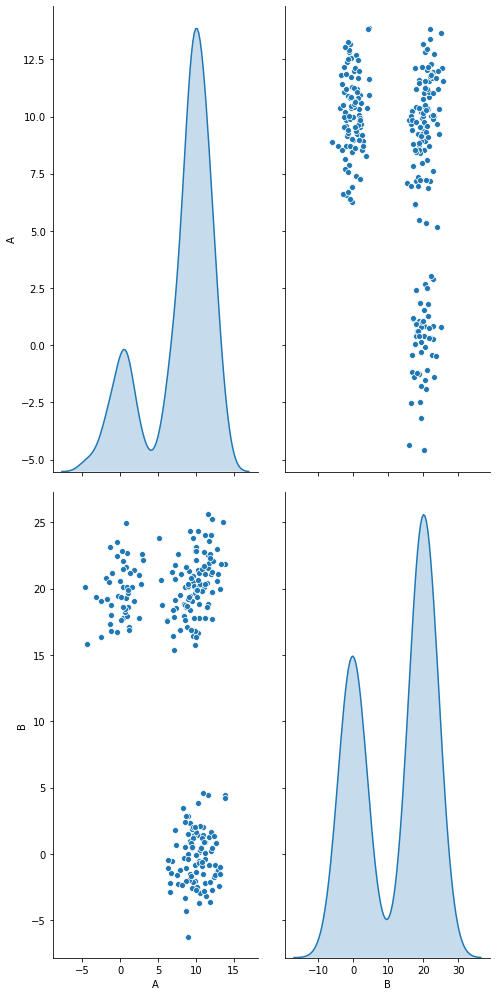

In [11]:
sns.pairplot(df, size=7,aspect=0.5 , diag_kind='kde')

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [12]:
df_z = df.apply(zscore)

In [13]:
Z = linkage(df, method='ward', metric='euclidean')

### 12. Plot the dendrogram for the consolidated dataframe

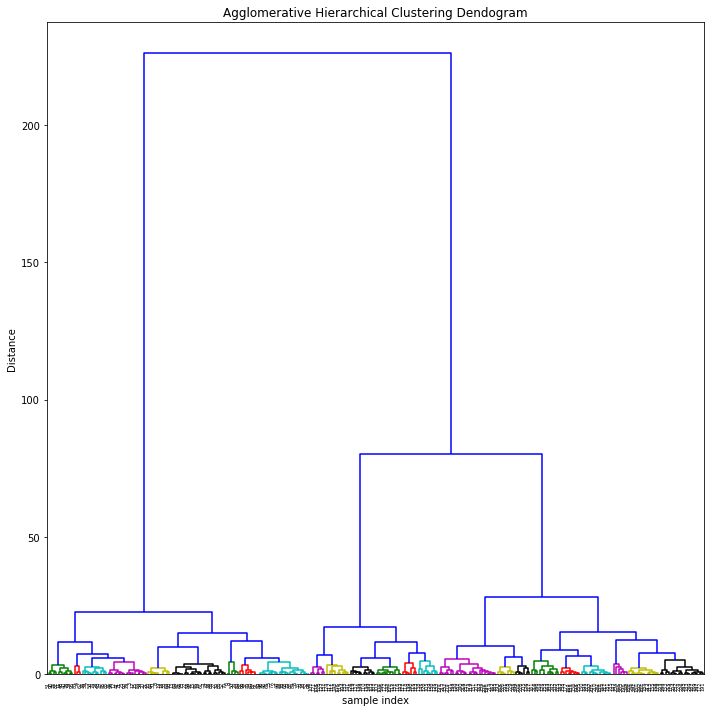

In [14]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 5.5, leaf_font_size=5)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

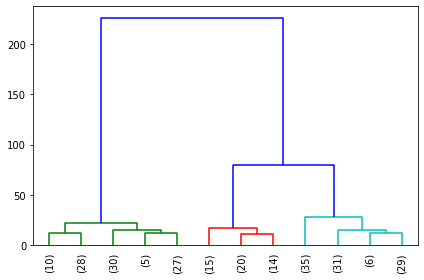

In [15]:
dataSet = dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=10,p=12, truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [16]:
optimalDistance = 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [17]:
C = fcluster(Z, criterion='distance', t=optimalDistance)
C

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

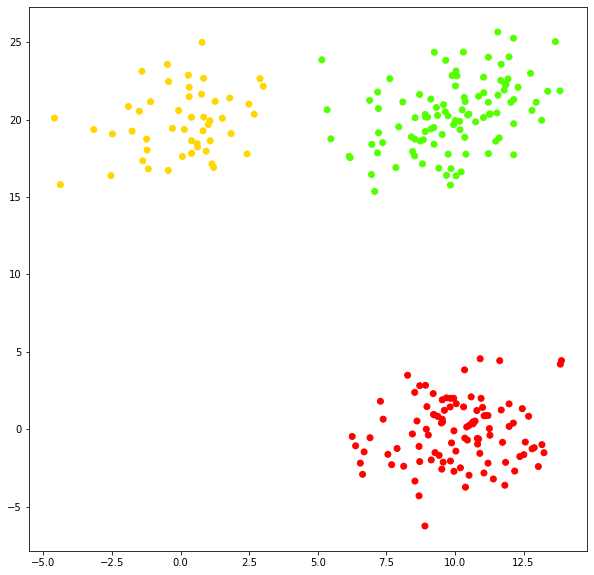

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:, 1], c=C, cmap='prism')
plt.show()